In [9]:
def getEdges(img):
    horizontalEdges = np.array([[-1,0,-1],[0,0,0],[1,0,1]])
    verticalEdges = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    horizontalEdgescards = np.zeros(img.shape)
    verticalEdgescards = np.zeros(img.shape)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            horizontalEdgescards[i,j] = np.sum(img[i-1:i+2, j-1:j+2]*horizontalEdges)
            verticalEdgescards[i,j] = np.sum(img[i-1:i+2, j-1:j+2]*verticalEdges)

    edges = verticalEdgescards + horizontalEdgescards
    return edges

In [12]:
thresh1 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,107,9)
edge = getEdges(thresh1)

In [24]:
grad_x = cv2.Sobel(thresh1, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)


In [42]:

edge = cv2.dilate(cv2.Canny(thresh1, np.min(img), np.max(img)), None)


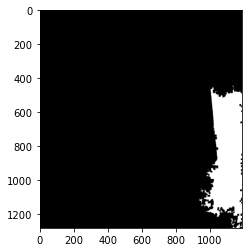

In [51]:
import os
import cv2
os.system('cls')
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import skimage
from skimage.color import rgb2gray
from skimage.color import gray2rgb
from skimage.filters import try_all_threshold
from skimage import filters

# ret,thresh1 = cv2.threshold(img,np.mean(img),255,cv2.THRESH_BINARY)
img = cv2.imread('zaid.jpeg', 0)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret,thresh1 = cv2.threshold(img,np.mean(img),255,cv2.THRESH_BINARY)

# dil = cv2.dilate(grad_x, None)
# dil = cv2.erode(dil, None)
# dil = cv2.dilate(dil, None)
# dil = cv2.dilate(dil, None)
# dil = cv2.dilate(dil, None)
edge = cv2.erode(edge, None)
# edge = cv2.dilate(edge, None)
edge = cv2.erode(edge, None)
# edge = cv2.dilate(edge, None)
cnt = sorted(cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]

mask = np.zeros(img.shape, dtype='uint8')

drawn_contours = cv2.drawContours(mask, [cnt], -1, 255, -1)

dst = cv2.bitwise_and(img, img, mask=mask)
# dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(mask, cmap=plt.get_cmap('gray'))
plt.show()